In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import pandas as pd 


In [2]:
train_dir = '/kaggle/input/kermany2018/OCT2017 /train'
print("Train Directory --> ", os.listdir(train_dir))

validation_dir = '/kaggle/input/kermany2018/OCT2017 /val'
print("Validation Directory --> ", os.listdir(validation_dir))

test_dir = '/kaggle/input/kermany2018/OCT2017 /test'
print("Test Directory --> ", os.listdir(test_dir))


Train Directory -->  ['DRUSEN', 'CNV', 'NORMAL', 'DME']
Validation Directory -->  ['DRUSEN', 'CNV', 'NORMAL', 'DME']
Test Directory -->  ['DRUSEN', 'CNV', 'NORMAL', 'DME']


In [3]:
import os

output_dir = '/kaggle/input/kermany2018/OCT2017 /train'

class_names = ['CNV', 'DME', 'DRUSEN', 'NORMAL']

for class_name in class_names:
    class_dir = os.path.join(output_dir, class_name)

    if os.path.exists(class_dir):
        num_images = len(os.listdir(class_dir))
        print(f"{class_name}: {num_images} images")
    else:
        print(f"Directory not found: {class_dir}")


CNV: 37205 images
DME: 11348 images
DRUSEN: 8616 images
NORMAL: 26315 images


Categories: ['DRUSEN', 'CNV', 'NORMAL', 'DME']


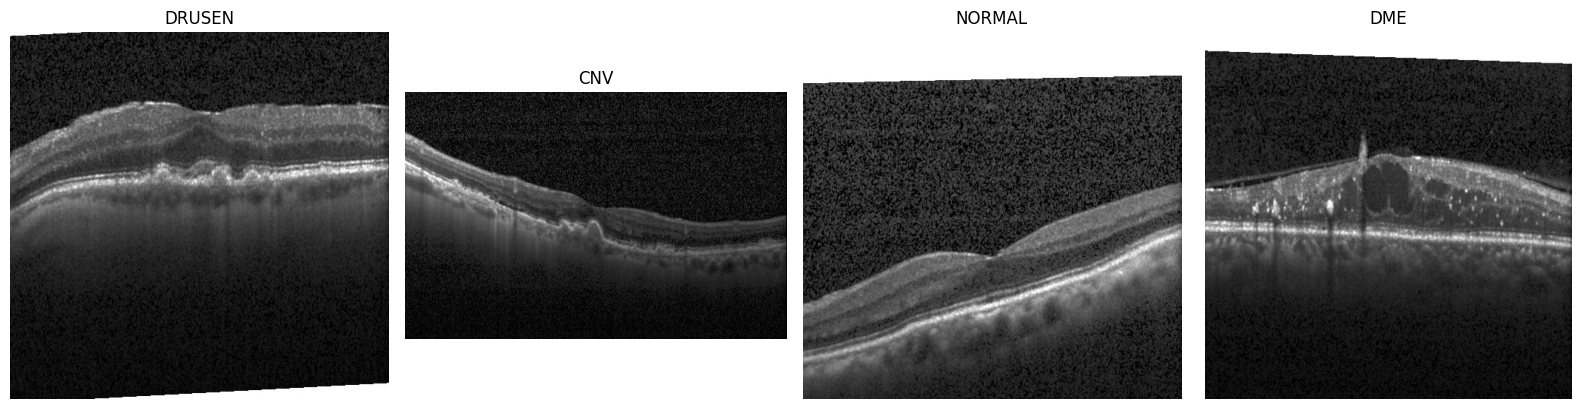

In [4]:
from PIL import Image

categories = os.listdir(train_dir)
print("Categories:", categories)

num_categories = len(categories)

plt.figure(figsize=(num_categories * 4, 4))

for idx, category in enumerate(categories):
    category_path = os.path.join(train_dir, category)
    image_files = os.listdir(category_path)

    if image_files:
        img_path = os.path.join(category_path, image_files[0])
        img = Image.open(img_path)

        # Subplot لكل فئة
        plt.subplot(1, num_categories, idx + 1)
        plt.imshow(img, cmap='gray')
        plt.title(category)
        plt.axis('off')

plt.tight_layout()
plt.show()


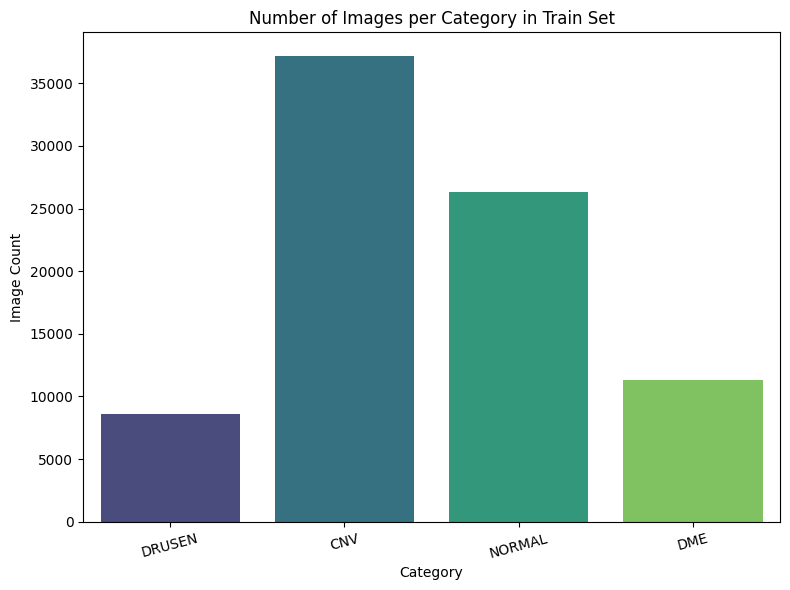

In [5]:
import seaborn as sns
category_counts = {}
for category in os.listdir(train_dir):
    category_path = os.path.join(train_dir, category)
    count = len(os.listdir(category_path))
    category_counts[category] = count

df = pd.DataFrame(list(category_counts.items()), columns=['Category', 'Count'])

plt.figure(figsize=(8, 6))
sns.barplot(x='Category', y='Count', data=df, palette='viridis')

plt.title('Number of Images per Category in Train Set')
plt.xlabel('Category')
plt.ylabel('Image Count')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


In [6]:
import os
import random
import shutil

balanced_dir = '/kaggle/working/train_balanced'
os.makedirs(balanced_dir, exist_ok=True)

min_count = min([len(os.listdir(os.path.join(train_dir, cat))) for cat in os.listdir(train_dir)])
print("Balancing to:", min_count, "images per category")

for category in os.listdir(train_dir):
    src_path = os.path.join(train_dir, category)
    dst_path = os.path.join(balanced_dir, category)
    os.makedirs(dst_path, exist_ok=True)

    images = os.listdir(src_path)
    sampled_images = random.sample(images, min_count)

    for img_name in sampled_images:
        shutil.copy(os.path.join(src_path, img_name), os.path.join(dst_path, img_name))


Balancing to: 8616 images per category


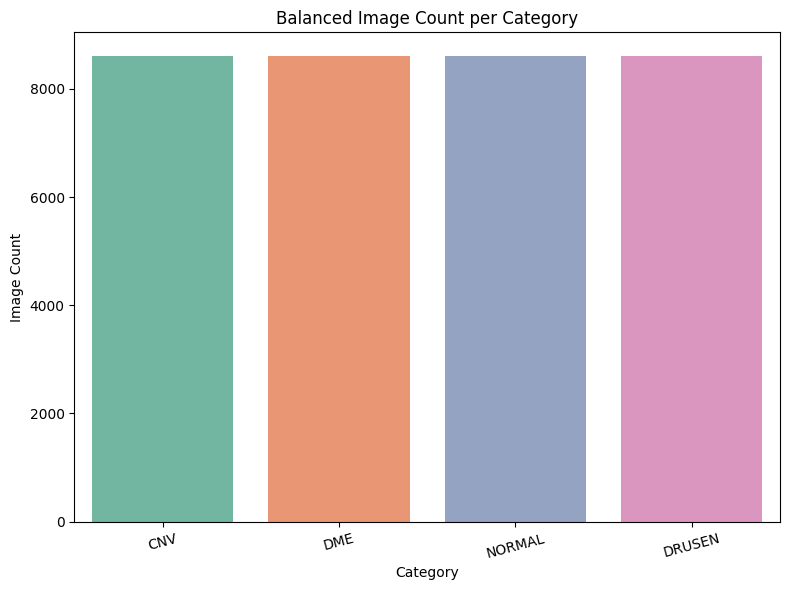

In [7]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

balanced_dir = '/kaggle/working/train_balanced'

category_counts = {}
for category in os.listdir(balanced_dir):
    category_path = os.path.join(balanced_dir, category)
    count = len(os.listdir(category_path))
    category_counts[category] = count

# نحولهم لـ DataFrame
df = pd.DataFrame(list(category_counts.items()), columns=['Category', 'Count'])

# نرسم count plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Category', y='Count', data=df, palette='Set2')

plt.title('Balanced Image Count per Category')
plt.xlabel('Category')
plt.ylabel('Image Count')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


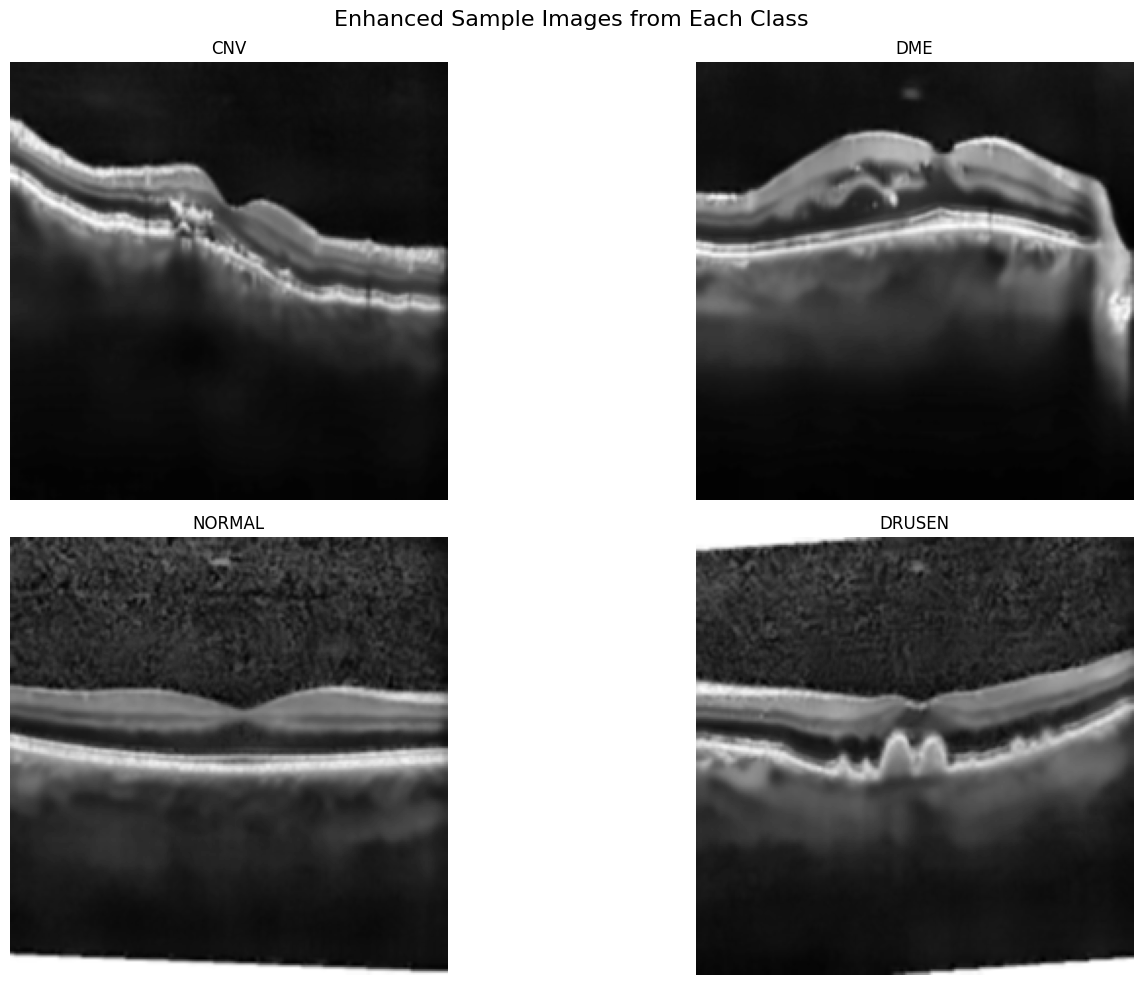

In [8]:
import cv2

balanced_dir = '/kaggle/working/train_balanced'
categories = os.listdir(balanced_dir)

plt.figure(figsize=(16, 10))

for i, category in enumerate(categories):
    img_path = os.path.join(balanced_dir, category, os.listdir(os.path.join(balanced_dir, category))[0])
    
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    img_resized = cv2.resize(img, (224, 224))

    img_denoised = cv2.fastNlMeansDenoising(img_resized, h=10)

    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    img_clahe = clahe.apply(img_denoised)

    img_blur = cv2.GaussianBlur(img_clahe, (3,3), 0)

    plt.subplot(2, 2, i+1)
    plt.imshow(img_blur, cmap='gray')
    plt.title(category)
    plt.axis('off')

plt.suptitle("Enhanced Sample Images from Each Class", fontsize=16)
plt.tight_layout()
plt.show()


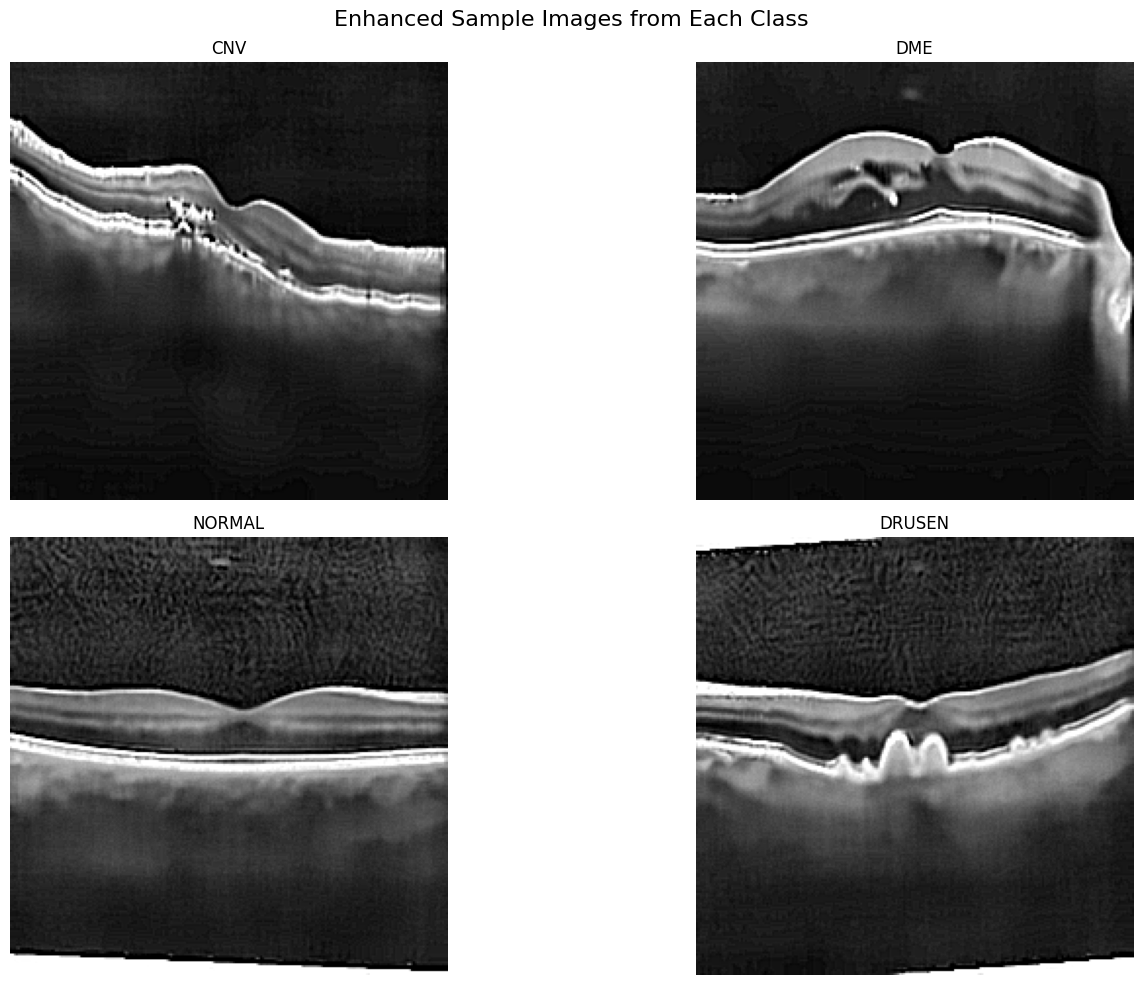

In [9]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

categories = os.listdir(balanced_dir)

plt.figure(figsize=(16, 10))

for i, category in enumerate(categories):
    img_path = os.path.join(balanced_dir, category, os.listdir(os.path.join(balanced_dir, category))[0])
    
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    img_resized = cv2.resize(img, (224, 224))

    img_denoised = cv2.fastNlMeansDenoising(img_resized, h=15)

    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(6,6))
    img_clahe = clahe.apply(img_denoised)

    img_blur = cv2.GaussianBlur(img_clahe, (3,3), 0)

    sharpen_kernel = np.array([[-1,-1,-1], [-1, 9,-1], [-1,-1,-1]])
    img_sharpened = cv2.filter2D(img_blur, -1, sharpen_kernel)

    # عرض الصورة
    plt.subplot(2, 2, i+1)
    plt.imshow(img_sharpened, cmap='gray')
    plt.title(category)
    plt.axis('off')

plt.suptitle("Enhanced Sample Images from Each Class", fontsize=16)
plt.tight_layout()
plt.show()


In [10]:
import os
import cv2

input_dir = '/kaggle/working/train_balanced'
output_dir = '/kaggle/working/train_enhanced'

os.makedirs(output_dir, exist_ok=True)

for category in os.listdir(input_dir):
    category_input_path = os.path.join(input_dir, category)
    category_output_path = os.path.join(output_dir, category)

    os.makedirs(category_output_path, exist_ok=True)

    for img_name in os.listdir(category_input_path):
        img_path = os.path.join(category_input_path, img_name)

        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        if img is None:
            print(f"تحذير: لم يتم تحميل الصورة {img_path} بشكل صحيح.")
            continue

        # Resize
        img_resized = cv2.resize(img, (224, 224))

        # Denoising
        img_denoised = cv2.fastNlMeansDenoising(img_resized, h=10)

        # CLAHE
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        img_clahe = clahe.apply(img_denoised)

        # Gaussian Blur
        img_blur = cv2.GaussianBlur(img_clahe, (3, 3), 0)

        # Save the enhanced image
        output_img_path = os.path.join(category_output_path, img_name)
        cv2.imwrite(output_img_path, img_blur)


In [11]:
import os
import shutil
import random
from sklearn.model_selection import train_test_split

train_enhanced_dir = '/kaggle/working/train_enhanced'
val_orig_dir = '/kaggle/input/kermany2018/OCT2017 /val'
test_orig_dir = '/kaggle/input/kermany2018/OCT2017 /test'

merged_dir = '/kaggle/working/merged_all_data'

final_base_dir = '/kaggle/working/final_split'
splits = ['train', 'val', 'test']
split_ratios = [0.65, 0.2, 0.15]

for source_dir in [train_enhanced_dir, val_orig_dir, test_orig_dir]:
    for class_name in os.listdir(source_dir):
        class_path = os.path.join(source_dir, class_name)
        if not os.path.isdir(class_path):
            continue
        
        merged_class_dir = os.path.join(merged_dir, class_name)
        os.makedirs(merged_class_dir, exist_ok=True)

        for img in os.listdir(class_path):
            src = os.path.join(class_path, img)
            dst = os.path.join(merged_class_dir, f"{class_name}_{img}")
            shutil.copy2(src, dst)

for class_name in os.listdir(merged_dir):
    images = os.listdir(os.path.join(merged_dir, class_name))
    random.shuffle(images)

    train_imgs, temp_imgs = train_test_split(images, test_size=(1 - split_ratios[0]), random_state=42)
    val_imgs, test_imgs = train_test_split(temp_imgs, test_size=split_ratios[2] / (split_ratios[1] + split_ratios[2]), random_state=42)

    for split_name, split_imgs in zip(splits, [train_imgs, val_imgs, test_imgs]):
        split_class_dir = os.path.join(final_base_dir, split_name, class_name)
        os.makedirs(split_class_dir, exist_ok=True)

        for img_name in split_imgs:
            src = os.path.join(merged_dir, class_name, img_name)
            dst = os.path.join(split_class_dir, img_name)
            shutil.copy2(src, dst)


In [12]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report


2025-04-30 14:17:41.692174: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746022662.216772      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746022662.368624      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [13]:
train_dir = '/kaggle/working/final_split/train'
val_dir   = '/kaggle/working/final_split/val'
test_dir  = '/kaggle/working/final_split/test'


In [14]:
img_size = (224, 224)
batch_size = 32


In [15]:
datagen = ImageDataGenerator(rescale=1./255)


In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load training images (in RGB mode)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    color_mode='rgb',  # <<< مهم جداً
    shuffle=True
)

# Load validation images
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    color_mode='rgb' ,
)


Found 22724 images belonging to 4 classes.
Found 6992 images belonging to 4 classes.


In [17]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False,
    color_mode='rgb'  
)


Found 5246 images belonging to 4 classes.


In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# بناء النموذج
model = Sequential()

# First Convolutional Block
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.0001), input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Block
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.0001)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional Block
model.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.0001)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten
model.add(Flatten())

# Fully Connected Layers
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.0001)))
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.0001)))
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(4, activation='softmax'))



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [48]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [49]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 256)                 │      22,151,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,278,084 (84.98 MB)

 Trainable params: 22,278,084 (84.98 MB)

 Non-trainable params: 0 (0.00 B)

In [50]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
# Get class indices
class_indices = train_generator.class_indices
class_labels = list(class_indices.keys())

# Calculate class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)

In [51]:
# Convert to dictionary
class_weights = dict(enumerate(class_weights))
print(class_weights)


{0: 0.9912755191066132, 1: 1.0003521746786406, 2: 1.013921113689095, 3: 0.9947469795132201}


In [52]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)


history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    class_weight=class_weights,
    callbacks=[early_stopping]
)


Epoch 1/10
711/711 ━━━━━━━━━━━━━━━━━━━━ 54s 67ms/step - accuracy: 0.3104 - loss: 1.4145 - val_accuracy: 0.5917 - val_loss: 1.0662
Epoch 2/10
711/711 ━━━━━━━━━━━━━━━━━━━━ 48s 66ms/step - accuracy: 0.5684 - loss: 1.0613 - val_accuracy: 0.6906 - val_loss: 0.8480
Epoch 3/10
711/711 ━━━━━━━━━━━━━━━━━━━━ 45s 63ms/step - accuracy: 0.6558 - loss: 0.8861 - val_accuracy: 0.7120 - val_loss: 0.7784
Epoch 4/10
711/711 ━━━━━━━━━━━━━━━━━━━━ 46s 64ms/step - accuracy: 0.7303 - loss: 0.7508 - val_accuracy: 0.7836 - val_loss: 0.6392
Epoch 5/10
711/711 ━━━━━━━━━━━━━━━━━━━━ 47s 66ms/step - accuracy: 0.7709 - loss: 0.6635 - val_accuracy: 0.7909 - val_loss: 0.6242
Epoch 6/10
711/711 ━━━━━━━━━━━━━━━━━━━━ 45s 63ms/step - accuracy: 0.8159 - loss: 0.5678 - val_accuracy: 0.8207 - val_loss: 0.5660
Epoch 7/10
711/711 ━━━━━━━━━━━━━━━━━━━━ 46s 64ms/step - accuracy: 0.8543 - loss: 0.4761 - val_accuracy: 0.8327 - val_loss: 0.5451
Epoch 8/10
711/711 ━━━━━━━━━━━━━━━━━━━━ 46s 64ms/step - accuracy: 0.8772 - loss: 0.4240 - 

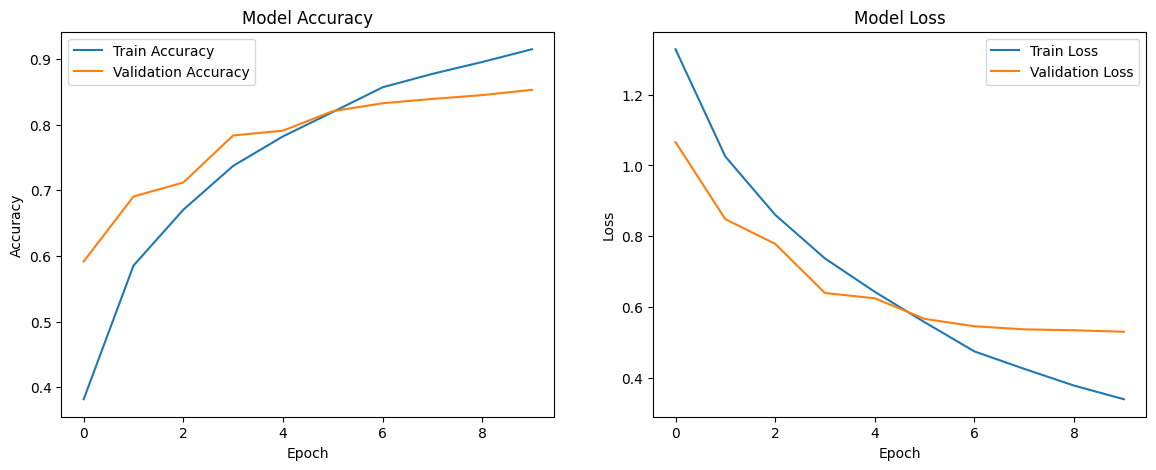

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


164/164 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step


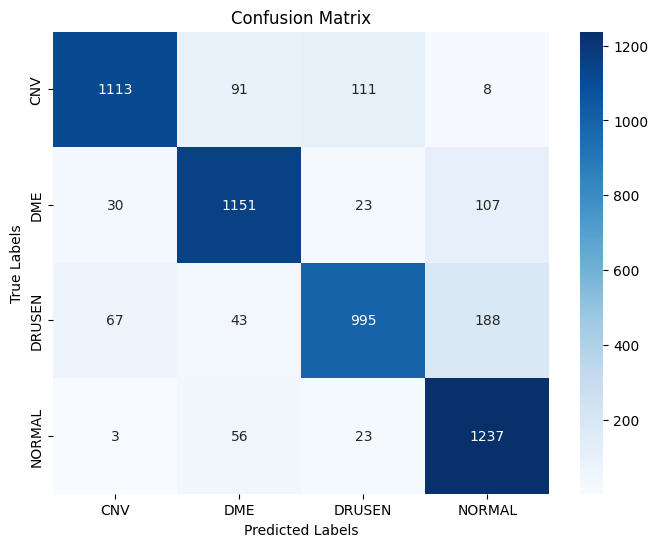

In [54]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Predict on test data
y_pred_probs = model.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

# True labels
y_true = test_generator.classes

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=list(test_generator.class_indices.keys()),
            yticklabels=list(test_generator.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [55]:
# Classification Report
report = classification_report(y_true, y_pred, target_names=list(test_generator.class_indices.keys()))
print(report)


              precision    recall  f1-score   support

         CNV       0.92      0.84      0.88      1323
         DME       0.86      0.88      0.87      1311
      DRUSEN       0.86      0.77      0.81      1293
      NORMAL       0.80      0.94      0.87      1319

    accuracy                           0.86      5246
   macro avg       0.86      0.86      0.86      5246
weighted avg       0.86      0.86      0.86      5246



In [56]:
train_loss, train_acc = model.evaluate(train_generator, verbose=0)
print(f"Train Accuracy: {train_acc:.4f}")

val_loss, val_acc = model.evaluate(val_generator, verbose=0)
print(f"Validation Accuracy: {val_acc:.4f}")


Train Accuracy: 0.9631
Validation Accuracy: 0.8531


In [28]:
test_loss, test_acc = model.evaluate(test_generator, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")


Test Accuracy: 0.8100
